In [ ]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'Arial'
plt.style.use('tableau-colorblind10')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.interpolate import PchipInterpolator as pchip
import os, sys
sys.path.append('..')
from cal_func import *

In [2]:
labels_aq = [r'1 H$_{2}$O', r'2 H$_{2}$O', r'3 H$_{2}$O', r'4 H$_{2}$O', r'5 H$_{2}$O', r'6 H$_{2}$O']
labels_Mn_aq = [r'Mn$^{2+}$', r'MnCl$^{+}$', r'MnCl$_{2}$', r'MnCl$_{3}^{+}$', 'Full']
labels_Mn = [r'Mn(H$_{2}$O)$_{6}^{2+}$', r'MnCl$^{+}$', r'MnCl$_{2}$', r'MnCl$_{3}^{+}$', 'Full']
labels_ForRep = ['1.62 M in water', '1.63 M in HCl', '8.93$\cdot$10$^{-1}$ M in water', '8.76$\cdot$10$^{-1}$ M in HCl']

functionals = ['cam', 'wb']
aq_list = ['1aq', '2aq', '3aq', '4aq', '5aq', '6aq']

percentage_low = [0.448, 0.245, 0.237, 0.0815]
percentage_high = [0.281, 0.262, 0.313, 0.144]

In [3]:
path = '../../../../../KU/Bachelor+Research/Data/Calculations/water_sim/'

data = read_data(path)

display(data['epsilon_fRep'])

,wavelength,s1.3,s2.3,s3.3,s4.3,s5.3,s6.3
0,200.0,1.375474,0.490330,2.417942,0.847191,175.990935,89.641588
1,200.1,1.383669,0.502409,2.426784,0.874247,177.906194,85.761000
2,200.2,1.385518,0.520742,2.441446,0.918313,182.162323,74.895353
3,200.3,1.391680,0.556059,2.444692,0.976764,180.459871,72.761029
4,200.4,1.395377,0.581994,2.462039,1.014551,179.395839,71.596853
...,...,...,...,...,...,...,...
6996,899.6,0.001048,0.000858,0.000560,0.002854,6.809806,7.179088
6997,899.7,0.001417,0.000920,0.002015,0.002169,8.725065,6.208941
6998,899.8,0.000431,0.000920,0.000336,0.000913,6.597000,7.567147
6999,899.9,-0.000062,-0.000123,-0.000448,0.000000,5.745774,3.686559


In [4]:
dict_cam_low, dict_cam_high = scaled_spec_water(data['uvvis_v2'], percentage_low, percentage_high, functionals, aq_list)

vacuum_low = scaled_spectra(data['camb3lyp_uvvis'], percentage_low)
vacuum_high = scaled_spectra(data['camb3lyp_uvvis'], percentage_high)

water_low = scaled_spectra(data['camb3lyp_water_uvvis'], percentage_low)
water_high = scaled_spectra(data['camb3lyp_water_uvvis'], percentage_high)

# display(dict_cam_high)

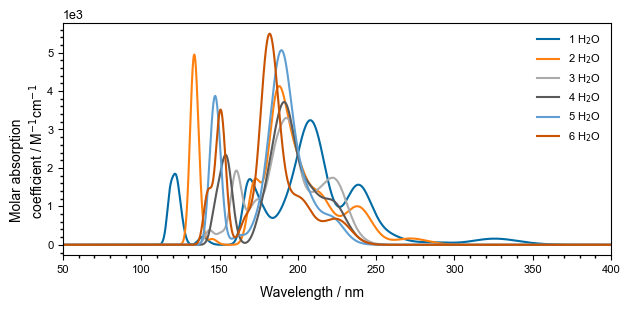

In [5]:
fig, ax = plt.subplots(1,1, figsize = (6.3, 3))

scaled_plot_dict(ax, dict_cam_low, labels_aq, (3,3), 1)

ax.set_xlim(50, 400)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption \n coefficient / M$^{-1}$cm$^{-1}$', fontsize = 10)
fig.tight_layout(pad = 0.5)
plt.savefig('scaled_cam_low.png', dpi = 150)
plt.show()

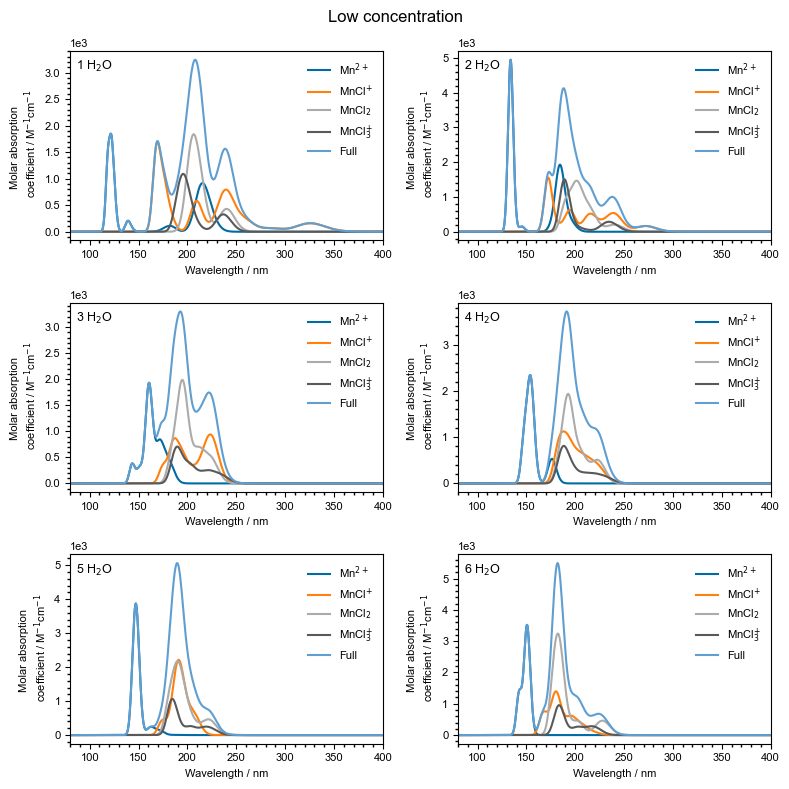

In [6]:
fig, axes = plt.subplots(3,2, figsize = (8,8))

scaled_plot_species(axes[0][0], dict_cam_low['cam 1aq'], dict_cam_low['cam 1aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[0][0].set_xlim(80, 400)
scaled_plot_species(axes[0][1], dict_cam_low['cam 2aq'], dict_cam_low['cam 2aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[0][1].set_xlim(80, 400)
scaled_plot_species(axes[1][0], dict_cam_low['cam 3aq'], dict_cam_low['cam 3aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[1][0].set_xlim(80, 400)
scaled_plot_species(axes[1][1], dict_cam_low['cam 4aq'], dict_cam_low['cam 4aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[1][1].set_xlim(80, 400)
scaled_plot_species(axes[2][0], dict_cam_low['cam 5aq'], dict_cam_low['cam 5aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[2][0].set_xlim(80, 400)
scaled_plot_species(axes[2][1], dict_cam_low['cam 6aq'], dict_cam_low['cam 6aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[2][1].set_xlim(80, 400)

sublabels = [r'1 H$_{2}$O', r'2 H$_{2}$O', r'3 H$_{2}$O', r'4 H$_{2}$O', r'5 H$_{2}$O', r'6 H$_{2}$O']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.9, l, transform = ax.transAxes, fontsize = 9)

fig.suptitle('Low concentration')

fig.tight_layout()
plt.savefig('full_scaled_cam_low.png', dpi = 150)
plt.show()

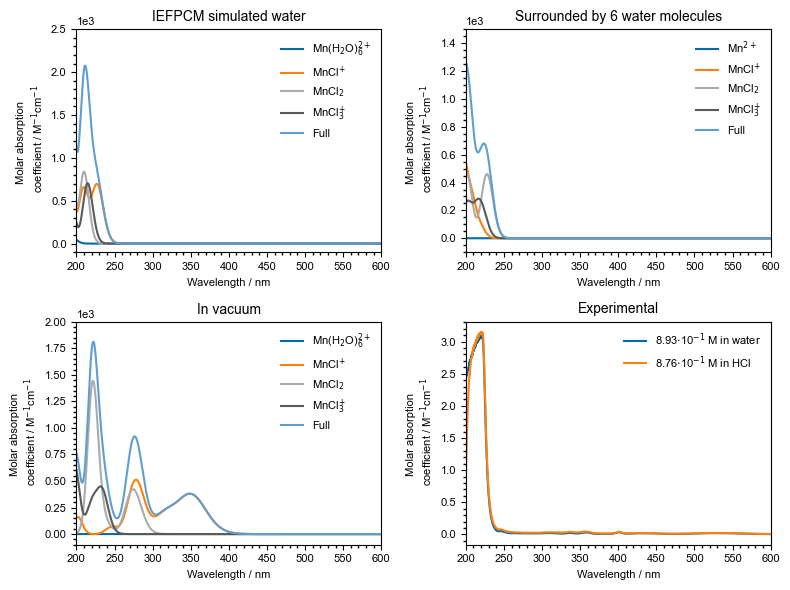

In [7]:
fig, axes = plt.subplots(2,2, figsize = (8,6))

scaled_plot_species(axes[0][0], water_low, water_low.keys()[1:6], labels_Mn, (3,3), 1)
axes[0][0].set_xlim(200, 600)
axes[0][0].set_ylim(-10**(2), 2.5*10**3)
axes[0][0].set_title('IEFPCM simulated water', fontsize = 10)
scaled_plot_species(axes[0][1], dict_cam_low['cam 6aq'], dict_cam_low['cam 6aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[0][1].set_xlim(200, 600)
axes[0][1].set_ylim(-10**(2), 1.5*10**3)
axes[0][1].set_title('Surrounded by 6 water molecules', fontsize = 10)
scaled_plot_species(axes[1][0], vacuum_low, vacuum_low.keys()[1:6], labels_Mn, (3,3), 1)
axes[1][0].set_xlim(200, 600)
axes[1][0].set_ylim(-10**(2), 2*10**3)
axes[1][0].set_title('In vacuum', fontsize = 10)
experimental_plot(axes[1][1], data['epsilon_fRep'], 's3.3', labels_ForRep[2], 1)
experimental_plot(axes[1][1], data['epsilon_fRep'], 's4.3', labels_ForRep[3], 1)
axes[1][1].set_xlim(200, 600)
axes[1][1].set_title('Experimental', fontsize = 10)

# fig.suptitle('Low concentration')

fig.tight_layout()
plt.savefig('low_w_ex.png', dpi = 150)
plt.show()

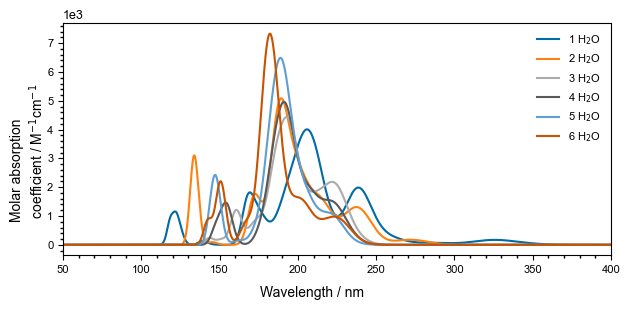

In [8]:
fig, ax = plt.subplots(1,1, figsize = (6.3, 3))

scaled_plot_dict(ax, dict_cam_high, labels_aq, (3,3), 1)

ax.set_xlim(50, 400)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption \n coefficient / M$^{-1}$cm$^{-1}$', fontsize = 10)
fig.tight_layout(pad = 0.5)
plt.savefig('scaled_cam_high.png', dpi = 150)
plt.show()

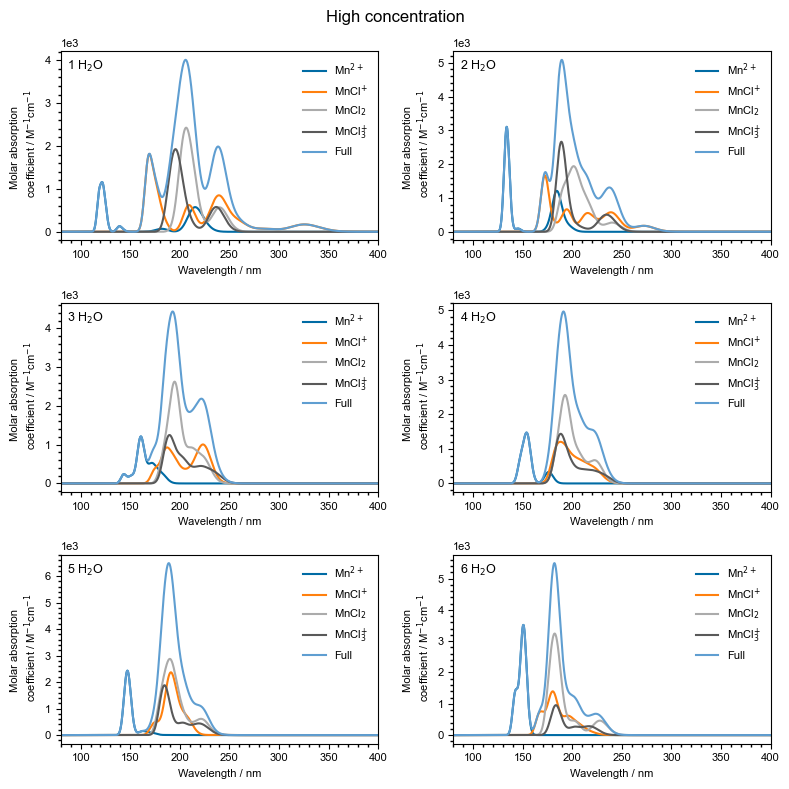

In [9]:
fig, axes = plt.subplots(3,2, figsize = (8,8))

scaled_plot_species(axes[0][0], dict_cam_high['cam 1aq'], dict_cam_high['cam 1aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[0][0].set_xlim(80, 400)
scaled_plot_species(axes[0][1], dict_cam_high['cam 2aq'], dict_cam_high['cam 2aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[0][1].set_xlim(80, 400)
scaled_plot_species(axes[1][0], dict_cam_high['cam 3aq'], dict_cam_high['cam 3aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[1][0].set_xlim(80, 400)
scaled_plot_species(axes[1][1], dict_cam_high['cam 4aq'], dict_cam_high['cam 4aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[1][1].set_xlim(80, 400)
scaled_plot_species(axes[2][0], dict_cam_high['cam 5aq'], dict_cam_high['cam 5aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[2][0].set_xlim(80, 400)
scaled_plot_species(axes[2][1], dict_cam_low['cam 6aq'], dict_cam_low['cam 6aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[2][1].set_xlim(80, 400)

sublabels = [r'1 H$_{2}$O', r'2 H$_{2}$O', r'3 H$_{2}$O', r'4 H$_{2}$O', r'5 H$_{2}$O', r'6 H$_{2}$O']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.9, l, transform = ax.transAxes, fontsize = 9)

fig.suptitle('High concentration')

fig.tight_layout()
plt.savefig('full_scaled_cam_high.png', dpi = 150)
plt.show()

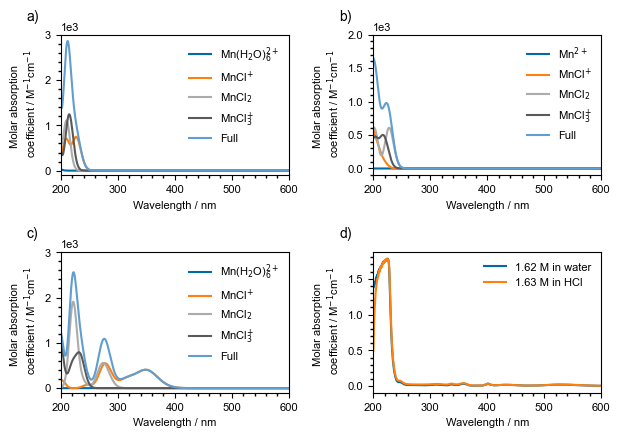

In [10]:
fig, axes = plt.subplots(2,2, figsize = (6.4,4.5))

scaled_plot_species(axes[0][0], water_high, water_high.keys()[1:6], labels_Mn, (3,3), 1)
axes[0][0].set_xlim(200, 600)
axes[0][0].set_ylim(-10**(2), 3*10**3)
# axes[0][0].set_title('IEFPCM simulated water', fontsize = 10)
scaled_plot_species(axes[0][1], dict_cam_high['cam 6aq'], dict_cam_high['cam 6aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[0][1].set_xlim(200, 600)
axes[0][1].set_ylim(-10**(2), 2*10**3)
# axes[0][1].set_title('Surrounded by 6 water', fontsize = 10)
scaled_plot_species(axes[1][0], vacuum_high, vacuum_high.keys()[1:6], labels_Mn, (3,3), 1)
axes[1][0].set_xlim(200, 600)
axes[1][0].set_ylim(-10**(2), 3*10**3)
# axes[1][0].set_title('In vacuum', fontsize = 10)
experimental_plot(axes[1][1], data['epsilon_fRep'], 's1.3', labels_ForRep[0], 1)
experimental_plot(axes[1][1], data['epsilon_fRep'], 's2.3', labels_ForRep[1], 1)
axes[1][1].set_xlim(200, 600)
# axes[1][1].set_title('Experimental', fontsize = 10)

sublabels = ['a)', 'b)', 'c)', 'd)']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(-0.15, 1.1, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
plt.savefig('high_w_ex.jpg', dpi = 600)
plt.show()

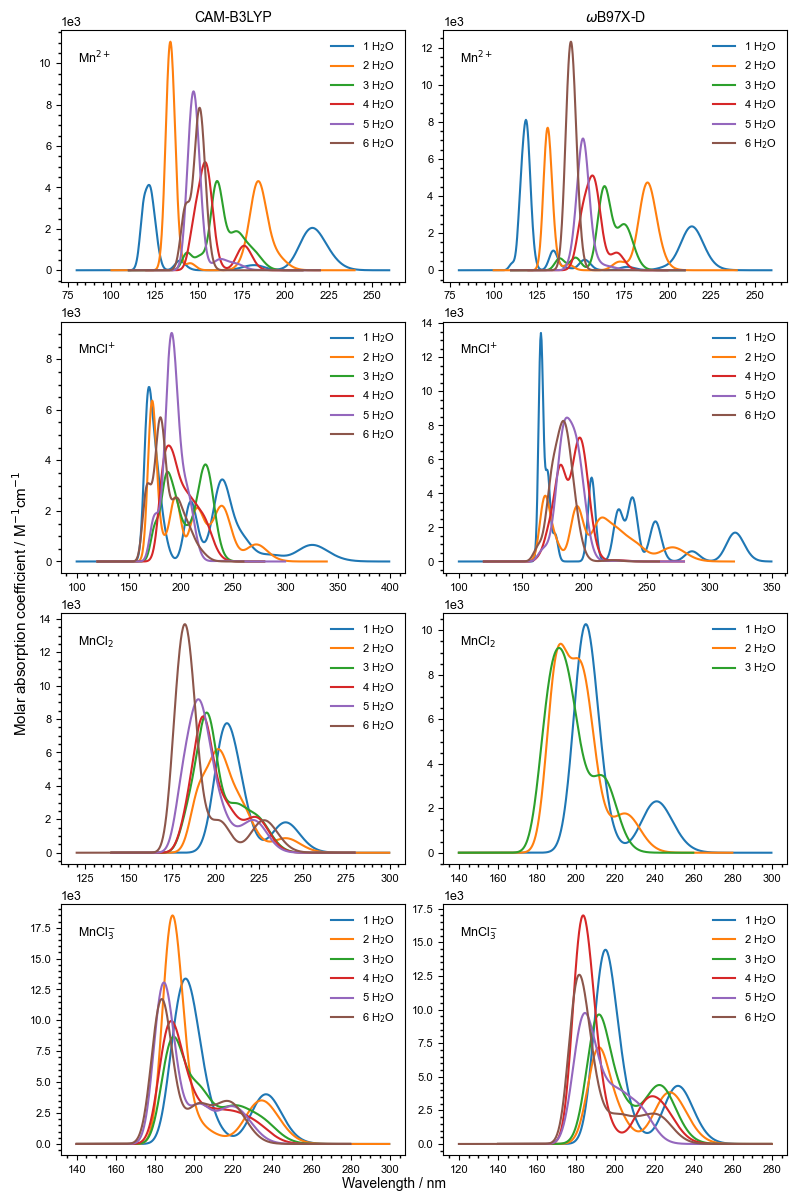

In [11]:
fig, axes = plt.subplots(4,2, figsize = (8,12))

for X_key, Y_key in zip(data['uvvis_v2'].keys()[::2], data['uvvis_v2'].keys()[1::2]):
    if 'Mn' in X_key:
        # CAM-B3LYP Mn(II)
        if 'cam' in X_key:
            make_subplot(axes[0][0], data['uvvis_v2'], X_key, Y_key, labels_aq, (3,3), 1)
        # wB97X-D Mn(II)
        if 'wb' in X_key:
            make_subplot(axes[0][1], data['uvvis_v2'], X_key, Y_key, labels_aq, (3,3), 1)

    if 'Cl ' in X_key:
        # CAM-B3LYP MnCl+
        if 'cam' in X_key:
            make_subplot(axes[1][0], data['uvvis_v2'], X_key, Y_key, labels_aq, (3,3), 1)
        # wB97X-D MnCl+
        if 'wb' in X_key:
            labels = labels_aq[:2]+ [''] + labels_aq[3:]
            make_subplot(axes[1][1], data['uvvis_v2'], X_key, Y_key, labels, (3,3), 1)

    if 'Cl2' in X_key:
        # CAM-B3LYP MnCl2
        if 'cam' in X_key:
            make_subplot(axes[2][0], data['uvvis_v2'], X_key, Y_key, labels_aq, (3,3), 1)
        # wB97X-D MnCl2
        if 'wb' in X_key:
            make_subplot(axes[2][1], data['uvvis_v2'], X_key, Y_key, labels_aq[:3], (3,3), 1)

    if 'Cl3' in X_key:
        # CAM-B3LYP MnCl3-
        if 'cam' in X_key:
            make_subplot(axes[3][0], data['uvvis_v2'], X_key, Y_key, labels_aq, (3,3), 1)
        # wB97X-D MnCl3-
        if 'wb' in X_key:
            make_subplot(axes[3][1], data['uvvis_v2'], X_key, Y_key, labels_aq, (3,3), 1)

axes[0][0].set_title('CAM-B3LYP', fontsize = 10)
axes[0][1].set_title(r'$\omega$B97X-D', fontsize = 10)

sublabels = ['Mn$^{2+}$', 'Mn$^{2+}$', 'MnCl$^{+}$', 'MnCl$^{+}$', 'MnCl$_{2}$', 'MnCl$_{2}$', 
             'MnCl$_{3}^{-}$', 'MnCl$_{3}^{-}$']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.05, 0.87, l, transform = ax.transAxes, fontsize = 9)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption coefficient / M$^{-1}$cm$^{-1}$', fontsize = 11)
fig.tight_layout(pad=0.5)
plt.savefig('water_sim_v2.png', dpi = 150)
plt.show()